In [4]:
import sys
sys.executable

'/opt/homebrew/Cellar/jupyterlab/4.5.2/libexec/bin/python'

!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn statsmodels

Ana Paola Loredo Moreno
613772 

Doy mi palabra de que he realizado esta actividad con integridad académica. 

## Introducción
La felicidad es un concepto díficil de medir sin embargo el World Happiness Report realizó una metodología para estimar el nivel de felicidad promedio de cada país año tras año. Para crear estos reportes, los investigadores observan estatus económicos, sociales y de salúd como factores que influyen a la felicidad.  En este reporte primero realizaremos una regresión lineal simple, interpretando la asociación entre el PIB promedio y felicidad correspondiente promedio por país. Tras interpretar los resultados, se añadirán tres variables al analisis, interpretando con la ayuda de una regresión lineal múltiple y ver la asociación de factores de interés con la felicidad.  

## Exploración de variables
En nuestro primer conjunto de datos, tenemos el promedio de felicidad junto con el país perteneciente y el PIB promedio. Tenemos un total de 141 filas de datos, siendo 141 países que se tomarán en cuenta para el análisis de felicidad. Primeramente, nos aseguramos de que no haya datos faltantes para realizar el análisis ya que puede desbalancear los resultados de nuestras gráficas. Explorando las variables, los datos del PIB son significativamente más grandes númericamente que los datos de felicidad, por lo que sería complicado de comparar los datos con el otro. Para mitigar el problema, se aplicó un calculo logaritmico a la columna de datos GDP. De esta manera podemos mejorar la estabilidad numérica del modelo.

In [7]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# cargar datos
df = pd.read_csv("A1.2 Felicidad y GDP.csv")
df

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
...,...,...,...
136,Botswana,3.4711,1.493007e+10
137,Rwanda,3.2682,1.018435e+10
138,Zimbabwe,2.9951,1.805117e+10
139,Lebanon,2.9553,2.594892e+10


In [8]:
df.describe()

,Felicidad,GDP
count,141.000000,1.410000e+02
mean,5.560004,5.889942e+11
std,1.098011,2.221612e+12
min,2.403800,1.223876e+09
25%,4.887900,1.805117e+10
50%,5.585300,6.215800e+10
75%,6.309100,3.452960e+11
max,7.821000,2.089370e+13


In [9]:
print(df.isnull().sum())

Pais         0
Felicidad    0
GDP          0
dtype: int64


In [20]:
### regresion lineal simple
y = df["Felicidad"]
df["log_GDP"] = np.log(df["GDP"])
x = df["log_GDP"]


## Modelo de regresión lineal simple
Siguiente definimos las variables dependientes (y) e independientes (x) que serán las que se graficarán para un modelo de regresión simple. 

- La variable dependiente (y) en este estudio es la "Felicidad". Se define como la variable dependiente ya que es la variable de interés en el estudio, como los demás factores se asocian al resultado final, que es el promedio de felicidad. 
- La variable independiente (x) es el PIB ya que es uno de los factores que pueden influir en el estado de felicidad.


In [21]:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           3.83e-09
Time:                        23:53:49   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

## Atributos importantes de resumen 
- R-squared: 0.222, señala que el modelo explica aproximadamente el 22.2 % de la variabilidad del nivel de felicidad, esto siendo capacidad explicativa moderada.
- Valor t (GDP): 6.292, determina si la relación entre las variables es estadísticamente diferente de cero. Al ser arriba de 6, si existe relación.
- Valor f: 39.59, un valor alto confirma que el modelo de regresión lineal es relevante a la variable dependiente.
- p value: 0.000, es evidencia estadística de que el GDP tiene un impacto significativo sobre el nivel de felicidad.


Para un enfoque visual, podemos ver la gráfica de la regresión lineal a continuación:  
En el eje Y tenemos nuestra variable dependiente que es la felicidad y en el eje x la variable independiente (GDP). Como podemos ver, existe una tendencia lineal con los datos reales de los 141 países. Como se explica en los atributos anteriormente mencionados, existe una tendencia sin embargo la asociación no es el único factor que influye en la felicidad por lo que no se muestra una tendencia lo suficientemente fuerte para seguir la linea recta. 

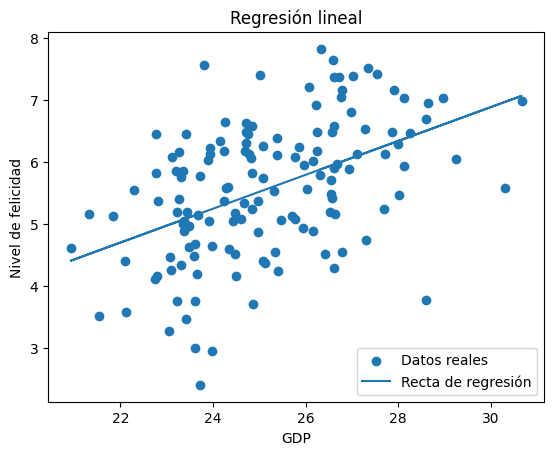

In [ ]:
df["log_GDP"] = np.log(df["GDP"])

X = df["log_GDP"]
Y = df["Felicidad"]

X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm).fit()

plt.scatter(X, Y, label="Datos reales")
plt.plot(X, model.predict(X_sm), label="Recta de regresión")

plt.xlabel("GDP")
plt.ylabel("Nivel de felicidad")
plt.title("Regresión lineal")
plt.legend()
plt.show()


## Extensión de variables

En este estudio, interpretamos la relación entre el PIB de una persona y su nivel de felicidad. Como hemos visto, tiene una asociación directa pero aún hay más factores que influyen en la felicidad de una persona. El World Happiness Report reporta las siguientes variables: libertad, apoyo social, salúd física, generosidad, perspectivas de corrupción y PIB. Explorando los datos y gráficas de WHR, las siguientes variables muestran más peso en los datos:
- Relaciones interpersonales
- Salúd física
- Libertad de la persona

A continuación se interpretará una regresión lineal múltiple, agregando nuevas variables al conjunto de datos. 

## Regresión lineal múltiple

In [23]:
## CODIGO GENERADO CON AYUDA DE IA PARA LIMPIEZA DE DATOS DE CSV NUEVO

import pandas as pd
import statsmodels.api as sm

df2 = pd.read_csv("world_happiness_scores_2022.csv")

df2 = df2.iloc[:-1]

cols = [
    "Explained by: GDP per capita",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Social support"
]

for col in cols:
    df2[col] = (
        df2[col]
        .astype(str)               
        .str.replace(",", ".", regex=False) 
        .str.strip()               
    )

# 5. Convertir a numérico
df2[cols] = df2[cols].apply(pd.to_numeric, errors="coerce")
df2["Happiness score"] = pd.to_numeric(df2["Happiness score"], errors="coerce")

print("Valores NaN por columna:")
print(df2[cols + ["Happiness score"]].isna().sum())

data_model = df2[cols + ["Happiness score"]].dropna()

print("\nDimensión final del dataset:", data_model.shape)

X = sm.add_constant(data_model[cols])
y = data_model["Happiness score"]

model = sm.OLS(y, X).fit()

# 10. Resumen del modelo
print(model.summary())

Valores NaN por columna:
Explained by: GDP per capita                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Social support                  0
Happiness score                               0
dtype: int64

Dimensión final del dataset: (146, 5)
                            OLS Regression Results                            
Dep. Variable:        Happiness score   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.07e-43
Time:                        00:02:09   Log-Likelihood:                -1122.6
No. Observations:                 146   AIC:                             2255.
Df Residuals:                     141   BIC:                             2270.
Df Model:                           4              

Datos importantes del reporte:

General de modelo
Estadístico f: 112.9
R-squared: 0.762, señala que el modelo explica aproximadamente el 76.2 % de la variabilidad del nivel de felicidad, esto siendo capacidad explicativa alta.

- PIB
   - valor-p   0.01
   - estadistico t: 2.623
   - El PIB mantiene un efecto positivo y estadísticamente significativo sobre la felicidad, aunque su impacto es menor en comparación con       otras variables sociales, lo que sugiere que el ingreso por sí solo no es el principal determinante del bienestar.


- Salúd física
  - valor-p: 0.003
  - estadistico t: 3.060
  - Presenta una relación positiva y significativa con la felicidad, indicando que mejores condiciones de salud se asocian con mayores niveles de bienestar subjetivo.


- Libertad
  - valor-p: 0.000
  - estadistico t: 5.528
  - Es una de las variables con mayor impacto estadístico, lo que resalta la importancia de la autonomía personal y social en la percepción de felicidad.


- Apoyo social: 0.000
  - valor-p: 0.000
  - estadístico t: 5.704
  - Resulta ser la variable más influyente del modelo, sugiriendo que la existencia de redes de apoyo y relaciones sociales sólidas es un factor clave en el bienestar de los países.
  


## Comparación
En contraste con el modelo de regresión simple que interpreta la asociación de las variables GDP y felicidad, la inclusión de variables sociales y de salud incrementa sustancialmente el poder explicativo del modelo de 22% a 76 % tomando en cuenta la estadística F. A pesar de que la regresión lineal simple mostraba una tendencia linear en su gráfico, no demostraba una tendencia lo suficientemente solida para interpretar que el GDP fuera el único factor que influyera en la felicidad. Tras la realización de la regresión lineal múltiple, podemos ver que el apoyo social y la libertad son las dos variables con más impacto estadístico hacia la felicidad de una persona. 


## Conclusión
Para concluir, en este reporte analizamos un conjunto de datos, con variable de interés siendo la "felicidad". Primero se realizó una regresión lineal simple para analizar la relación entre el factor económico en la felicidad y se mostró una tendencia positiva que evidenciaba la relación entre ambas variables, sin embargo el modelo aún tenía oportunidad de mejorar su capacidad explicativa. Para la siguiente parte del estudio, se realizó una regresión lineal múltiple, añadiendo 3 variables independientes al conjunto de datos. Las tres variables añadidas fueron el apoyo social, libertad y salúd física. Al terminar el segundo modelo, las estadísticas mostraron mejorar significativamente la capacidad explicativa del modelo y evidenciando que el apoyo social y la libertad son las variables que tienen más impacto estadístico en la felicidad. Nuestra primera gráfica evidencia que hay una relación directa entre el PIB y la felicidad sin embargo el resto del reporte nos deja en claro que el PIB no es el único factor que se debe tomar en cuenta para definir la felicidad de una persona. Las redes de apoyo, la autonomía personal, condiciones de salúd y el estado económico de una persona en conjunto influye en la felicidad de una persona. 

## Referencias:
(S/f). Worldhappiness.report. Recuperado el 26 de enero de 2026, de https://www.worldhappiness.report/data-sharing/

Blokhin, A. (2015, junio 3). Linear vs. Multiple regression: What’s the difference? Investopedia. https://www.investopedia.com/ask/answers/060315/what-difference-between-linear-regression-and-multiple-regression.asp 
OpenAI. (2024). ChatGPT (versión GPT-4) [Modelo de lenguaje]. https://chat.openai.com/ 